In [2]:
#create a function to pull in data from dropbox 
#import all necessary libraries

import pandas as pd
import numpy as np
# from dotenv import load_dotenv
# from dotenv import find_dotenv
import os
from pathlib import Path
import requests
import pandas as pd
# import dropbox
# from dropbox.exceptions import AuthError



In [4]:
#get .env variables

load_dotenv()


#set up the path to the .env file
env_path = Path('.') / '.env'
load_dotenv(dotenv_path=env_path)

#get api token from .env file
link = os.getenv("api_box")
key= os.getenv("ak")
sec=os.getenv("as")

In [66]:
#set up dropbox
dbx = dropbox.Dropbox(key)

#set up the path to the file in dropbox
path = '/test.csv'


In [67]:
#define a function using oauth2 to authenticate with dropbox
def dropbox_list_files(path):
    """Return a Pandas dataframe of files in a given Dropbox folder path in the Apps directory.
    """

    dbx = dropbox_connect()

    try:
        files = dbx.files_list_folder(path).entries
        files_list = []
        for file in files:
            if isinstance(file, dropbox.files.FileMetadata):
                metadata = {
                    'name': file.name,
                    'path_display': file.path_display,
                    'client_modified': file.client_modified,
                    'server_modified': file.server_modified
                }
                files_list.append(metadata)

        df = pd.DataFrame.from_records(files_list)
        return df.sort_values(by='server_modified', ascending=False)

    except Exception as e:
        print('Error getting list of files from Dropbox: ' + str(e))



In [68]:
dropbox_list_files('/Apps/OBDLink/CsvLogs/WVGEF9BP9GD001746')

Unable to refresh access token without                 refresh token and app key


Error getting list of files from Dropbox: AuthError('9666394b88634c53b68381cc3860308b', AuthError('expired_access_token', None))


In [34]:
#verify dropbox connection works

dbx_link.users_get_current_account()





Unable to refresh access token without                 refresh token and app key


AuthError: AuthError('5e16039c8f9f4501925ac7254cc24709', AuthError('expired_access_token', None))

In [4]:
'/Apps/OBDLink/CsvLogs/WVGEF9BP9GD001746'


In [3]:
#import csv from path
#drop first row and column
df1 = pd.read_csv('CSVLog_20221130_091051.csv', skiprows=1)


In [4]:
#drop first column
df1_col=df1.iloc[:,1:]
df=df1_col

In [5]:
df.head()

,Latitude (deg),Longitude (deg),Vehicle speed (MPH),Instant fuel economy (MPG),Total fuel economy (MPG),Fuel rate (gal/hr),Instant CO2 rate (lb/mile),Total CO2 (lbs),CO2 flow (lb/min),Accel X (ft/s²),...,Average Trip CO2 Rate (lb/mile),Max Speed (MPH),Seconds Idling (sec),Idling Count,Hard Accel Count,Hard Brake Count,Trip Duration (min),Trip Fuel Economy (MPG),Trip Fuel (gal),Trip Distance (miles)
0,29.56902,-95.21054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
1,29.56902,-95.21054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.294891,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
2,29.56902,-95.21054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.317437,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
3,29.56902,-95.21054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.317437,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
4,29.56902,-95.21054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.346312,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0


In [19]:



#normalize the data for a convolutional neural network

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df, test_size=0.2, random_state=42)

#reshape the data for the neural network
X_train_re = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_re = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


In [20]:
train_shape=(X_train_re.shape)
test_shape=(X_test_re.shape)
print(train_shape)
print(test_shape)

(30023, 106, 1)
(7506, 106, 1)


In [21]:

#build an autoencoder 2d convolutional model with skip connections for df data
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Reshape, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import regularizers
from keras import backend as K
from keras.callbacks import TensorBoard
import tensorflow as tf
from keras import optimizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau


#set up the conv1d model
nn_model = tf.keras.models.Sequential()
nn_model.build(input_shape=(None, 1, 1))
nn_model.add(tf.keras.layers.Conv1D(12,3,activation="relu",padding='same'))
nn_model.add(tf.keras.layers.MaxPooling1D(2))
nn_model.add(tf.keras.layers.Flatten())
nn_model.add(tf.keras.layers.Dense(units=106,activation='linear'))
nn_model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
es = tf.keras.callbacks.EarlyStopping(monitor='mae',patience=10)
tbCallBack = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)
cb_list = [es, tbCallBack]
nn_model.fit(X_train_re, X_train_re, epochs=5, shuffle=True, validation_data=(X_test, X_test), callbacks=cb_list)
nn_model.evaluate(X_test_re, X_test_re)


m=nn_model
m.summary()









Epoch 1/5
939/939 [==============================] - 5s 4ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0361 - val_loss: 7.0697e-04 - val_mse: 7.0697e-04 - val_mae: 0.0171
Epoch 2/5
939/939 [==============================] - 4s 4ms/step - loss: 4.5004e-04 - mse: 4.5004e-04 - mae: 0.0136 - val_loss: 3.8041e-04 - val_mse: 3.8041e-04 - val_mae: 0.0127
Epoch 3/5
939/939 [==============================] - 4s 4ms/step - loss: 2.6377e-04 - mse: 2.6377e-04 - mae: 0.0104 - val_loss: 2.4368e-04 - val_mse: 2.4368e-04 - val_mae: 0.0105
Epoch 4/5
939/939 [==============================] - 4s 4ms/step - loss: 1.8971e-04 - mse: 1.8971e-04 - mae: 0.0089 - val_loss: 2.0145e-04 - val_mse: 2.0145e-04 - val_mae: 0.0096
Epoch 5/5
235/235 [==============================] - 1s 2ms/step - loss: 1.3074e-04 - mse: 1.3074e-04 - mae: 0.0075
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)    

235/235 [==============================] - 9s 2ms/step


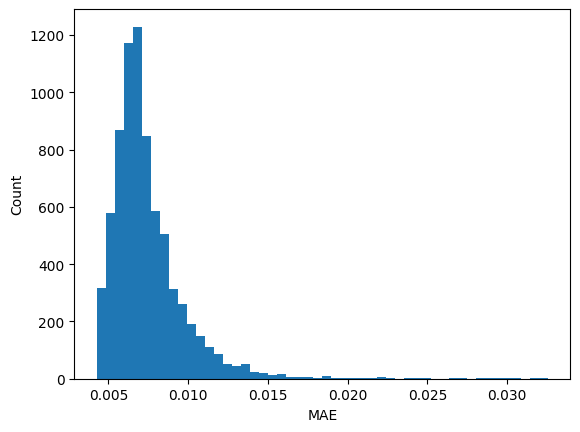

In [23]:
#compare the original data to the predicted data with tf.keras.losses.mae
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_poisson_deviance

#predict the data
pred = m.predict(X_test)

#calculate the mean absolute error
mae = tf.keras.losses.mae(X_test, pred)
#plot a historgram of the mae
plt.hist(mae, bins=50)
plt.xlabel('MAE')
plt.ylabel('Count')
plt.show()


